### Decision trees


Here, we will use decision trees for classification of Iris species (Setosa, Versicolor, Virginica). Use random_state=0 for splitting and building all models.

#### 1) Fit decision tree with maximum depth (max_depth) of 2 and the default gini index for building the tree. Find the classification accuracy. (3pts)

- Visualize the tree as follows (optional). First, import the graphviz package from terminal using the following:

brew install graphviz

OR

#conda install -c anaconda graphviz  
#conda install -c anaconda python-graphviz 

Then, use can use the package to visulaize the decision tree as follows: 
        
        from sklearn.tree import export_graphviz
        import graphviz 
        
     dot_data=export_graphviz(FittedTreeModel,class_names=iris_dataset.target_names,   feature_names=iris_dataset.feature_names,out_file=None)
        
       graph = graphviz.Source(dot_data)  
       graph 



In [6]:

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

treeModel=DecisionTreeClassifier(max_depth=2,criterion='gini')
iris_dataset=load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)


In [30]:
treeModel.fit(X_train,Y_train)
print("The  accuracy using Regression Tree is",treeModel.score(X_test,Y_test))

The  accuracy using Regression Tree is 0.8947368421052632


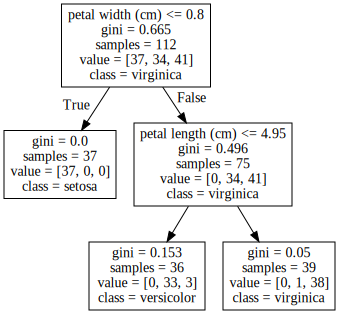

In [15]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data=export_graphviz(treeModel,class_names=iris_dataset.target_names, feature_names=iris_dataset.feature_names,out_file=None)

graph = graphviz.Source(dot_data)  
graph


#### 2) Use random forests to classify the Iris species. The random forests combines 4 decision trees, each of maximum depth 2 and maximum number of features considered at each split is 2. What is the classification accuracy? (3pts)



In [17]:
forestModel= RandomForestClassifier(n_estimators=4, max_features=2, max_depth=2, random_state=0) 

In [21]:
forestModel.fit(X_train,Y_train)
print("The  accuracy using random forrest is",forestModel.score(X_test,Y_test))

The  accuracy using random forrest is 0.9473684210526315


#### 3) Use AdaBoost with 4 decision tree models to perform the classification of the Iris species. What is the accuracy? Comment on results. (3pts)


In [20]:
BoostModel= AdaBoostClassifier(n_estimators=4)
BoostModel.fit(X_train,Y_train)
print("The  accuracy using BoostModel is",BoostModel.score(X_test,Y_test))

The  accuracy using BoostModel is 0.9736842105263158


The accuracy increases as we move ahead in the following model order : Decision tree-->Random Forrest --> AdaBoost. Random forrest perfroms better than decision tree as it chooses the majority of the results of the 4 diffrent regression trees. AdaBoost in turn performs better than Random Forrest as it trains the regression in trees in series and with each iteration learning from the shirtcomings of the last model thus resulting in a better accuracy score.

### Neural networks

#### Apply Neural networks (multilayer perceptron) to classify the Iris species, Build a model that has two hidden layers, the first layer has 10 neurons and second layer has 5 neurons. Use 'tanh' activation function, and set the regularization parameter alpha=0.5. Scale the feautures with MinMaxScaler. Try the following settings (a)-(c) and report the accuracy, then comment on the results.

a) Use gradient descent to solve the optimization  problem (i.e. get the weights), and choose random_state=0 (which corresponds to a particular initializationo of weight values), and set max_iter=5000. Print the accuracy. (3pts)
   
b) Repeat (a) above but with a model that uses random_state=10 to initialize the weights. Print the accuracy. (2pts)
    
    
c) Repeat (b) but with model that use L-BFGS (a numerical quasi-Newton method of optimization) instead of stochastic gradient descent to find the weights. Print the accuracy (3pts)
    
d) Comment on results (3pts)

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neural_network import MLPClassifier

MLPmodel=MLPClassifier(solver='sgd',max_iter=5000, activation= 'tanh' , random_state=0, hidden_layer_sizes=[10,5] , alpha=0.5)


In [25]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler().fit(X_train) 
X_train_transformed=scaler.transform(X_train) 
X_test_transformed=scaler.transform(X_test)

In [26]:
MLPmodel.fit(X_train_transformed,Y_train)
print("The  accuracy using Neural Network is",MLPmodel.score(X_test_transformed,Y_test))

The  accuracy using Neural Network is 0.9473684210526315


In [28]:
MLPmodel1=MLPClassifier(solver='sgd',max_iter=5000, activation= 'tanh' , random_state=10, hidden_layer_sizes=[10,5] , alpha=0.5)
MLPmodel1.fit(X_train_transformed,Y_train)
print("The  accuracy using Neural Network with random state =10 ",MLPmodel1.score(X_test_transformed,Y_test))

The  accuracy using Neural Network with random state =10  0.9210526315789473


In [29]:
MLPmodellbfgs=MLPClassifier(solver='lbfgs',max_iter=5000, activation= 'tanh' , random_state=10, hidden_layer_sizes=[10,5] , alpha=0.5)
MLPmodellbfgs.fit(X_train_transformed,Y_train)
print("The  accuracy using Neural Network with L-BFGS",MLPmodellbfgs.score(X_test_transformed,Y_test))

The  accuracy using Neural Network with L-BFGS 0.9736842105263158


The accuracy from part b) is greater than one obtained from part a) as when random state =10 it results in better distribution of weights.

The accuracy with L-BFGS is better since since  L-BFGS is a better numerical optimization technique than stochastic gradient descent as the size of dataset is relatively small(only 150 samples from dataset description).